# **Assignment 5**
## **Group 3:**
* Karyl Grasparil
* Mariah Quinquito
* Yanna Polonia

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from tensorflow.keras.layers import SimpleRNN, Activation, Dropout, Dense, Reshape, Conv1D
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np

# 1. Data

## Selecting four (or more) of the data files in stocks.zip to use as training data, two others for validation, and two others for testing

In [2]:
# Creating the training set using 4 data files from stocks.zip
train_file_list=['archive-2/Stocks/a.us.txt', 'archive-2/Stocks/aa.us.txt', 'archive-2/Stocks/aaap.us.txt', 'archive-2/Stocks/aaba.us.txt'] 

# Storing the first file
train_data = pd.DataFrame(pd.read_csv(train_file_list[0], sep = ',')) 

# Concatening the rest of files selected
for i in range(1,len(train_file_list)): 
    df = pd.DataFrame(pd.read_csv(train_file_list[i], sep = ','))
    train_data = pd.concat([train_data, df], axis = 0, ignore_index = True) 
    
train_data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
22529,2017-11-06,70.270,71.960,70.270,71.710,7129828,0
22530,2017-11-07,72.200,72.470,71.620,72.220,9161521,0
22531,2017-11-08,72.000,72.200,71.090,71.160,7363365,0
22532,2017-11-09,70.460,70.680,68.770,70.190,10054663,0


In [3]:
# Creating the testing set using 2 data files from stocks.zip
test_file_list=['archive-2/Stocks/ago.us.txt', 'archive-2/Stocks/agr.us.txt'] 

# Storing the first file
test_data = pd.DataFrame(pd.read_csv(test_file_list[0], sep = ',')) 

# Concatening the rest of files selected
for i in range(1,len(test_file_list)): 
    df = pd.DataFrame(pd.read_csv(test_file_list[i], sep = ','))
    test_data = pd.concat([test_data, df], axis = 0, ignore_index = True) 
    
test_data

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,16.190,16.388,16.190,16.343,83020,0
1,2005-02-28,16.292,16.429,16.180,16.334,110267,0
2,2005-03-01,16.360,16.388,16.223,16.378,162558,0
3,2005-03-02,16.388,16.421,16.334,16.378,133918,0
4,2005-03-03,16.343,16.412,16.259,16.259,74558,0
...,...,...,...,...,...,...,...
3675,2017-11-06,51.160,51.250,50.820,50.830,310201,0
3676,2017-11-07,50.910,51.380,50.910,51.320,515596,0
3677,2017-11-08,51.170,51.440,50.410,51.150,622199,0
3678,2017-11-09,50.930,51.430,50.710,50.790,434176,0


In [4]:
# Creating the validation set using 2 data files from stocks.zip
val_file_list=['archive-2/Stocks/al.us.txt', 'archive-2/Stocks/alb.us.txt'] 

# Storing the first file
val_data = pd.DataFrame(pd.read_csv(val_file_list[0], sep = ',')) 

# Concatening the rest of files selected
for i in range(1,len(val_file_list)): 
    df = pd.DataFrame(pd.read_csv(val_file_list[i], sep = ','))
    val_data = pd.concat([val_data, df], axis = 0, ignore_index = True) 
    
val_data

,Date,Open,High,Low,Close,Volume,OpenInt
0,2011-05-02,26.829,27.072,26.829,26.994,450990,0
1,2011-05-03,26.896,26.896,26.368,26.464,243692,0
2,2011-05-04,26.398,26.398,25.941,26.038,332309,0
3,2011-05-05,25.999,26.058,25.852,25.970,892620,0
4,2011-05-06,26.167,26.167,25.755,26.108,353078,0
...,...,...,...,...,...,...,...
4842,2017-11-06,140.240,142.000,140.140,141.970,951093,0
4843,2017-11-07,142.000,143.570,142.000,143.130,1560198,0
4844,2017-11-08,143.530,144.990,142.500,144.580,1745743,0
4845,2017-11-09,142.110,142.435,136.390,140.840,2588641,0


## Plotting the closing price in each data file using dates to label the x-axis

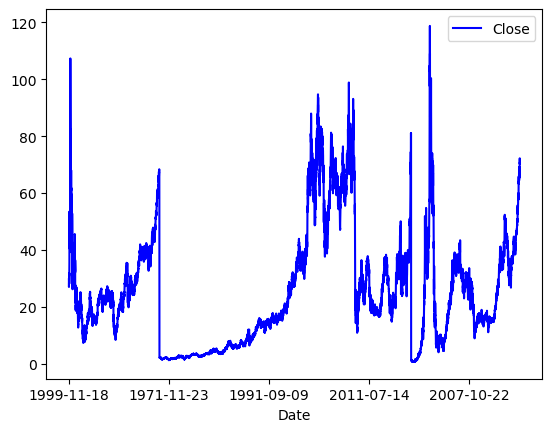

In [5]:
# train_data plot
train_data.plot('Date', 'Close', c = 'blue')
plt.show()

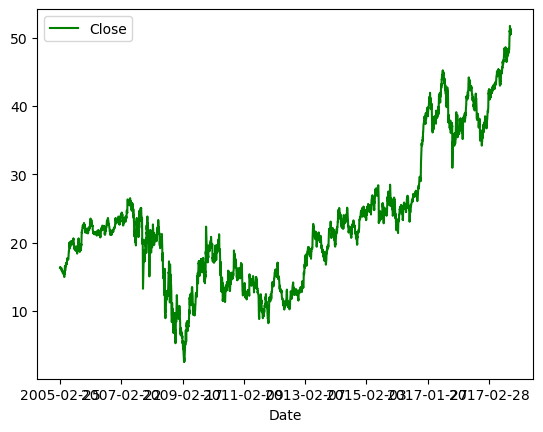

In [6]:
# test_data plot
test_data.plot('Date', 'Close', c = 'green')
plt.show()

<Figure size 1400x500 with 0 Axes>

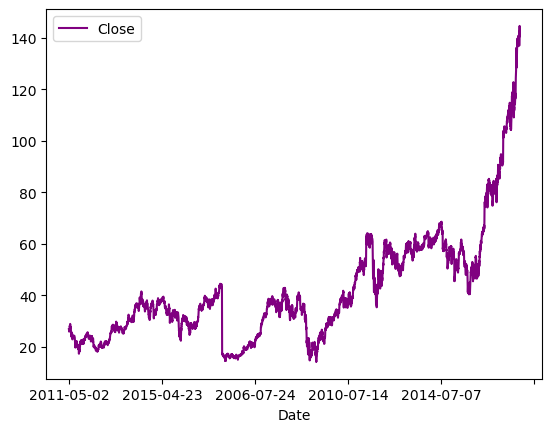

In [7]:
# val_data plot
plt.figure(figsize=[14,5])
val_data.plot('Date', 'Close', c = 'purple')
plt.show()

## Creating a function that loads the closing prices from a data file into input and label numpy arrays that are appropriate for training time sequence models to predict a price two days into the future, using a lookback value of your choice

In [8]:
def extract_closing_price(data, lookback):
    """
    Loads closing prices from a CSV file, processes them into input-output pairs for time series prediction.

    Parameters:
    - data: pandas DataFrame, containing the stock data
    - lookback: int, number of previous days to use for predicting the future price

    Returns:
    - inputs: numpy array, input data of shape (num_samples, lookback)
    - labels: numpy array, labels (future closing price) of shape (num_samples,)
    """
    # Extracting closing prices
    close_prices = data['Close'].values
    
    # Initializing lists to store input and label sequences
    inputs = []
    labels = []
    
    # Iterating through the data to create input-output pairs
    for i in range(len(close_prices) - lookback - 2):  # subtracting 2 for predicting 2 days ahead
        # The input is a sequence of the last 'lookback' days
        input_seq = close_prices[i:i + lookback]
        
        # The label is the closing price two days into the future
        label = close_prices[i + lookback + 2]  # Two days into the future
        
        inputs.append(input_seq)
        labels.append(label)
    
    # Converting inputs and labels to numpy arrays
    inputs = np.array(inputs)
    labels = np.array(labels)
    
    return inputs, labels

## Using the function created in the previous step to load all of the data files into 2d numpy arrays. Concatenating the input arrays and the label arrays. After this step, having a single array of sequences for inputs, and a single array of labels

In [9]:
lookback = 10  # Using the last 10 days to predict 2 days ahead

In [10]:
# Obatining inputs and labels from the train_data
train_inputs, train_labels = extract_closing_price(train_data, lookback)

print("Train Input shape:", train_inputs.shape)
print("Train Labels shape:", train_labels.shape)

Train Input shape: (22522, 10)
Train Labels shape: (22522,)


In [11]:
train_inputs

array([[29.702, 27.257, 29.702, ..., 28.48 , 28.986, 29.786],
       [27.257, 29.702, 27.002, ..., 28.986, 29.786, 30.039],
       [29.702, 27.002, 27.717, ..., 29.786, 30.039, 30.883],
       ...,
       [66.51 , 66.61 , 65.4  , ..., 70.59 , 70.51 , 70.23 ],
       [66.61 , 65.4  , 65.57 , ..., 70.51 , 70.23 , 71.71 ],
       [65.4  , 65.57 , 67.52 , ..., 70.23 , 71.71 , 72.22 ]])

In [12]:
train_labels

array([30.547, 30.505, 30.924, ..., 71.16 , 70.19 , 70.56 ])

In [13]:
# Obatining inputs and labels from the train_data
test_inputs, test_labels = extract_closing_price(test_data, lookback)

print("Train Input shape:", test_inputs.shape)
print("Train Labels shape:", test_labels.shape)

Train Input shape: (3668, 10)
Train Labels shape: (3668,)


In [14]:
test_inputs

array([[16.343, 16.334, 16.378, ..., 16.316, 16.292, 16.3  ],
       [16.334, 16.378, 16.378, ..., 16.292, 16.3  , 16.3  ],
       [16.378, 16.378, 16.259, ..., 16.3  , 16.3  , 16.214],
       ...,
       [48.27 , 49.5  , 49.84 , ..., 51.27 , 50.45 , 51.09 ],
       [49.5  , 49.84 , 50.51 , ..., 50.45 , 51.09 , 50.83 ],
       [49.84 , 50.51 , 51.04 , ..., 51.09 , 50.83 , 51.32 ]])

In [15]:
test_labels

array([16.232, 15.914, 15.998, ..., 51.15 , 50.79 , 50.56 ])

In [16]:
# Obatining inputs and labels from the train_data
val_inputs, val_labels = extract_closing_price(val_data, lookback)

print("Train Input shape:", val_inputs.shape)
print("Train Labels shape:", val_labels.shape)

Train Input shape: (4835, 10)
Train Labels shape: (4835,)


In [18]:
val_labels

array([ 28.292,  28.817,  28.974, ..., 144.58 , 140.84 , 140.62 ])

## Scaling the data

In [19]:
# Initializing the MinMaxScaler for the inputs and labels
input_scaler = MinMaxScaler()
label_scaler = MinMaxScaler()

def data_scale(features, labels, is_train):

    if is_train:
        # Fitting the scaler and transforming the features
        features = input_scaler.fit_transform(features)
        labels = label_scaler.fit_transform(labels.reshape(-1, 1))
        
    else:
        # Only transform the test/validation data, using the already fitted scaler
        features = input_scaler.transform(features)
        labels = label_scaler.transform(labels.reshape(-1, 1))
    
    return features, labels

In [20]:
# Scaling train_data
scaled_train_features, scaled_train_labels = data_scale(train_inputs, train_labels, True)
scaled_train_features.shape, scaled_train_labels.shape

((22522, 10), (22522, 1))

In [21]:
# Scaling test_data
scaled_test_features, scaled_test_labels = data_scale(test_inputs, test_labels, False)
scaled_test_features.shape, scaled_test_labels.shape

((3668, 10), (3668, 1))

In [22]:
# Scaling val_data
scaled_val_features, scaled_val_labels = data_scale(val_inputs, val_labels, False)
scaled_val_features.shape, scaled_val_labels.shape

((4835, 10), (4835, 1))

# 2. Modeling 

## Creating and compiling a time sequence model using tf.keras.Sequential. Using at least one Conv1d layer, one SimpleRNN layer, and one Dropout layer. Using mean_squared_error for the loss.

In [27]:
# Defining the Sequential model
initial_model = Sequential()

# Adding a Conv1D layer
initial_model.add(Conv1D(filters = 75, kernel_size = 3, activation = 'relu', input_shape = (train_inputs.shape[1], 1)))

# Adding a SimpleRNN layer, to capture temporal dependencies and the sequential nature of the data
initial_model.add(SimpleRNN(units = 50, activation = 'relu'))

# Adding a Dropout layer to prevent overfitting during training
initial_model.add(Dropout(0.3))

# Adding a Dense layer for the output (closing price prediction)
initial_model.add(Dense(1))

2024-11-11 22:17:32.978555: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-11 22:17:32.980103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
# Compiling the model with Mean Squared Error (MSE) loss function for regression, using Mean Absolute Error for performance tracking
initial_model.compile(optimizer = 'adam',  loss = 'mean_squared_error', metrics = ['mae'])

# Display the model summary
initial_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 75)             300       
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                6300      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 6,651
Trainable params: 6,651
Non-trainable params: 0
_________________________________________________________________


## Training the model on the training data without using a validation split. Calculating and recording the training loss.

In [31]:
history = initial_model.fit(scaled_train_features, scaled_train_labels, epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20


2024-11-11 22:17:51.189851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 22:17:51.276125: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_12.


704/704 [==============================] - 42s 58ms/step - loss: 0.0018 - mae: 0.0237
Epoch 2/20
704/704 [==============================] - 38s 53ms/step - loss: 8.5273e-04 - mae: 0.0175
Epoch 3/20
704/704 [==============================] - 38s 54ms/step - loss: 7.6566e-04 - mae: 0.0168
Epoch 4/20
704/704 [==============================] - 39s 55ms/step - loss: 7.0409e-04 - mae: 0.0163
Epoch 5/20
704/704 [==============================] - 39s 55ms/step - loss: 6.8026e-04 - mae: 0.0161
Epoch 6/20
704/704 [==============================] - 39s 55ms/step - loss: 6.7839e-04 - mae: 0.0160
Epoch 7/20
704/704 [==============================] - 38s 54ms/step - loss: 6.5525e-04 - mae: 0.0157
Epoch 8/20
704/704 [==============================] - 38s 55ms/step - loss: 6.6669e-04 - mae: 0.0157
Epoch 9/20
704/704 [==============================] - 38s 54ms/step - loss: 6.5186e-04 - mae: 0.0158
Epoch 10/20
704/704 [==============================] - 38s 55ms/step - loss: 6.5998e-04 - mae: 0.0158
Epoc

In [32]:
# Extracting, recording and displaying the last training loss from the history
last_training_loss = history.history['loss'][-1]
print(f'Initial Model Last Training Loss: {last_training_loss:.4f}')

Initial Model Last Training Loss: 0.0007


## Using the model to make predictions on the validation data. Calculating and recording the validation loss.

In [33]:
# Making predictions on the validation data
y_val_pred_scaled = initial_model.predict(scaled_val_features)

# Inversing scale the predictions and true values for meaningful comparison
y_val_pred = label_scaler.inverse_transform(y_val_pred_scaled)
#y_val_true = label_scaler.inverse_transform(scaled_val_labels.reshape(-1, 1))

# Calculating the validation loss (RMSE)
validation_loss = np.sqrt(mean_squared_error(val_labels, y_val_pred))
print("Validation RMSE:", validation_loss)

2024-11-11 22:30:54.486006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 2s 7ms/step
Validation RMSE: 3.420448825478523


## Creating plots of the validation data that show the true price as well as the model predictions, with date or index number along the x-axis

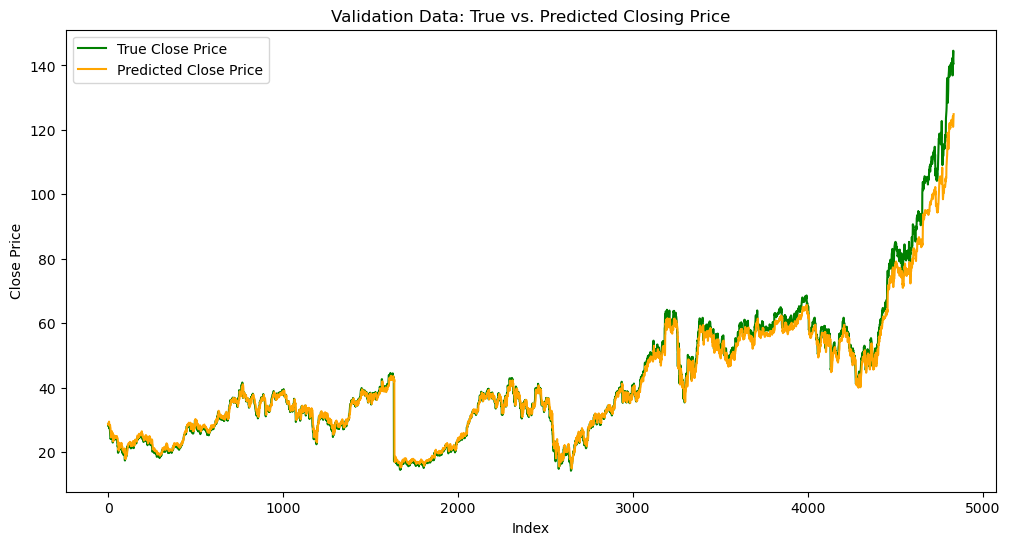

In [35]:
# Generating indexes for plotting if `dates` does not match y_val_true length
indexes = np.arange(len(val_labels))

# Plotting the Validation Data and Predictions with indexes
plt.figure(figsize = (12, 6))
plt.plot(indexes, val_labels, label = 'True Close Price', color = 'green')
plt.plot(indexes, y_val_pred, label = 'Predicted Close Price', color = 'orange')

# Adding title and labels
plt.title('Validation Data: True vs. Predicted Closing Price')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Revisiting the previous steps to make at least three models in total by changing architecture and hyperparameters

### Model 1

In [36]:
# Defining the Sequential model
model_1 = Sequential()

# Adding a Conv1D layer
model_1.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (train_inputs.shape[1], 1)))

# Adding a SimpleRNN layer, to capture temporal dependencies and the sequential nature of the data
model_1.add(SimpleRNN(units = 32, activation = 'relu'))

# Adding a Dropout layer to prevent overfitting during training
model_1.add(Dropout(0.2))

# Adding a Dense layer for the output (closing price prediction)
model_1.add(Dense(1))

In [37]:
# Compiling the model with Mean Squared Error (MSE) loss function for regression, using Mean Absolute Error for performance tracking
model_1.compile(optimizer = 'adam',  loss = 'mean_squared_error', metrics = ['mae'])

# Display the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 64)             256       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Training model_1
history_model_1 = model_1.fit(scaled_train_features, scaled_train_labels, epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20


2024-11-11 22:31:37.998170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 22:31:38.088124: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_12.


704/704 [==============================] - 40s 55ms/step - loss: 0.0011 - mae: 0.0197
Epoch 2/20
704/704 [==============================] - 39s 55ms/step - loss: 7.2335e-04 - mae: 0.0163
Epoch 3/20
704/704 [==============================] - 37s 53ms/step - loss: 7.0312e-04 - mae: 0.0165
Epoch 4/20
704/704 [==============================] - 39s 55ms/step - loss: 7.0519e-04 - mae: 0.0161
Epoch 5/20
704/704 [==============================] - 39s 55ms/step - loss: 6.9499e-04 - mae: 0.0159
Epoch 6/20
704/704 [==============================] - 38s 54ms/step - loss: 6.6727e-04 - mae: 0.0155
Epoch 7/20
704/704 [==============================] - 39s 55ms/step - loss: 6.3880e-04 - mae: 0.0152
Epoch 8/20
704/704 [==============================] - 39s 56ms/step - loss: 6.2414e-04 - mae: 0.0151
Epoch 9/20
704/704 [==============================] - 39s 55ms/step - loss: 6.2429e-04 - mae: 0.0151
Epoch 10/20
704/704 [==============================] - 39s 55ms/step - loss: 6.1033e-04 - mae: 0.0146
Epoc

In [39]:
# Extracting, recording and displaying the last training loss from history_model_1
model_1_last_training_loss = history_model_1.history['loss'][-1]
print(f'Model 1 Last Training Loss: {model_1_last_training_loss:.4f}')

Model 1 Last Training Loss: 0.0006


In [40]:
# Making predictions on the validation data 
y_val_pred_scaled_1 = model_1.predict(scaled_val_features)

# Inversing scale the predictions and true values for meaningful comparison
y_val_pred_1 = label_scaler.inverse_transform(y_val_pred_scaled_1)

# Calculating the validation loss (RMSE)
validation_loss_1 = np.sqrt(mean_squared_error(val_labels, y_val_pred_1))
print("Model 1 Validation RMSE:", validation_loss_1)

2024-11-11 22:44:46.293553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 2s 8ms/step
Model 1 Validation RMSE: 2.066010080263111


### Model 2

In [41]:
# Defining the Sequential model
model_2 = Sequential()

# Adding a Conv1D layer
model_2.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (train_inputs.shape[1], 1)))

# Adding a SimpleRNN layer, to capture temporal dependencies and the sequential nature of the data
model_2.add(SimpleRNN(units = 16, activation = 'relu'))

# Adding a Dropout layer to prevent overfitting during training
model_2.add(Dropout(0.15))

# Adding a Dense layer for the output (closing price prediction)
model_2.add(Dense(1))

In [42]:
# Compiling the model with Mean Squared Error (MSE) loss function for regression, using Mean Absolute Error for performance tracking
model_2.compile(optimizer = 'adam',  loss = 'mean_squared_error', metrics = ['mae'])

# Display the model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 32)             128       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Training model_2
history_model_2 = model_2.fit(scaled_train_features, scaled_train_labels, epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20


2024-11-11 22:45:00.773426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 22:45:00.849847: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_12.


704/704 [==============================] - 39s 54ms/step - loss: 0.0066 - mae: 0.0390
Epoch 2/20
704/704 [==============================] - 37s 53ms/step - loss: 0.0012 - mae: 0.0218
Epoch 3/20
704/704 [==============================] - 37s 53ms/step - loss: 0.0011 - mae: 0.0206
Epoch 4/20
704/704 [==============================] - 37s 53ms/step - loss: 0.0010 - mae: 0.0201
Epoch 5/20
704/704 [==============================] - 38s 53ms/step - loss: 9.5575e-04 - mae: 0.0194
Epoch 6/20
704/704 [==============================] - 38s 54ms/step - loss: 9.0566e-04 - mae: 0.0189
Epoch 7/20
704/704 [==============================] - 38s 54ms/step - loss: 8.7672e-04 - mae: 0.0183
Epoch 8/20
704/704 [==============================] - 38s 54ms/step - loss: 8.7166e-04 - mae: 0.0179
Epoch 9/20
704/704 [==============================] - 38s 54ms/step - loss: 8.2861e-04 - mae: 0.0175
Epoch 10/20
704/704 [==============================] - 38s 54ms/step - loss: 8.3449e-04 - mae: 0.0174
Epoch 11/20
704/

In [44]:
# Extracting, recording and displaying the last training loss from history_model_2
model_2_last_training_loss = history_model_2.history['loss'][-1]
print(f'Model 2 Last Training Loss: {model_2_last_training_loss:.4f}')

Model 2 Last Training Loss: 0.0008


In [45]:
# Making predictions on the validation data 
y_val_pred_scaled_2 = model_2.predict(scaled_val_features)

# Inversing scale the predictions and true values for meaningful comparison
y_val_pred_2 = label_scaler.inverse_transform(y_val_pred_scaled_2)

# Calculating the validation loss (RMSE)
validation_loss_2 = np.sqrt(mean_squared_error(val_labels, y_val_pred_2))
print("Model 1 Validation RMSE:", validation_loss_2)

2024-11-11 22:57:58.908878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 2s 7ms/step
Model 1 Validation RMSE: 2.7707410448622283


### Model 3

In [46]:
# Defining the Sequential model
model_3 = Sequential()

# Adding a Conv1D layer
model_3.add(Conv1D(filters = 128, kernel_size = 3, activation = 'relu', input_shape = (train_inputs.shape[1], 1)))

# Adding a SimpleRNN layer, to capture temporal dependencies and the sequential nature of the data
model_3.add(SimpleRNN(units = 64, activation = 'relu'))

# Adding a Dropout layer to prevent overfitting during training
model_3.add(Dropout(0.5))

# Adding a Dense layer for the output (closing price prediction)
model_3.add(Dense(1))

In [47]:
# Compiling the model with Mean Squared Error (MSE) loss function for regression, using Mean Absolute Error for performance tracking
model_3.compile(optimizer = 'adam',  loss = 'mean_squared_error', metrics = ['mae'])

# Display the model summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 8, 128)            512       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Training model_3
history_model_3 = model_3.fit(scaled_train_features, scaled_train_labels, epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20


2024-11-11 22:58:07.794694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 22:58:07.870868: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_12.


704/704 [==============================] - 38s 52ms/step - loss: 0.0029 - mae: 0.0295
Epoch 2/20
704/704 [==============================] - 37s 53ms/step - loss: 0.0010 - mae: 0.0190
Epoch 3/20
704/704 [==============================] - 36s 52ms/step - loss: 8.5861e-04 - mae: 0.0178
Epoch 4/20
704/704 [==============================] - 37s 52ms/step - loss: 8.1422e-04 - mae: 0.0176
Epoch 5/20
704/704 [==============================] - 36s 52ms/step - loss: 7.7968e-04 - mae: 0.0177
Epoch 6/20
704/704 [==============================] - 36s 52ms/step - loss: 8.0997e-04 - mae: 0.0181
Epoch 7/20
704/704 [==============================] - 36s 52ms/step - loss: 7.8415e-04 - mae: 0.0178
Epoch 8/20
704/704 [==============================] - 36s 52ms/step - loss: 7.5780e-04 - mae: 0.0174
Epoch 9/20
704/704 [==============================] - 36s 52ms/step - loss: 7.8295e-04 - mae: 0.0176
Epoch 10/20
704/704 [==============================] - 39s 56ms/step - loss: 7.3755e-04 - mae: 0.0173
Epoch 11

In [49]:
# Extracting, recording and displaying the last training loss from history_model_2
model_3_last_training_loss = history_model_3.history['loss'][-1]
print(f'Model 2 Last Training Loss: {model_3_last_training_loss:.4f}')

Model 2 Last Training Loss: 0.0008


In [50]:
# Making predictions on the validation data 
y_val_pred_scaled_3 = model_3.predict(scaled_val_features)

# Inversing scale the predictions and true values for meaningful comparison
y_val_pred_3 = label_scaler.inverse_transform(y_val_pred_scaled_3)

# Calculating the validation loss (RMSE)
validation_loss_3 = np.sqrt(mean_squared_error(val_labels, y_val_pred_3))
print("Model 1 Validation RMSE: ", validation_loss_3)

2024-11-11 23:10:27.878235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


152/152 [==============================] - 1s 7ms/step
Model 1 Validation RMSE:  3.204185623608593


## Choosing the best model by comparing how each model did on training and validation data; provide the reasoning for it

In [58]:
table_data = [
    ['Initial Model', last_training_loss, validation_loss],
    ['Model 1', model_1_last_training_loss, validation_loss_2],
    ['Model 2', model_2_last_training_loss, validation_loss_2],
    ['Model 3', model_3_last_training_loss, validation_loss_3]
]

# Headers for the table
headers = ['Model', 'Training Loss', 'Validation Loss']

# Displaying the table
print(tabulate(table_data, headers = headers, tablefmt = 'fancy_grid'))

╒═══════════════╤═════════════════╤═══════════════════╕
│ Model         │   Training Loss │   Validation Loss │
╞═══════════════╪═════════════════╪═══════════════════╡
│ Initial Model │     0.00065667  │           3.42045 │
├───────────────┼─────────────────┼───────────────────┤
│ Model 1       │     0.000614701 │           2.77074 │
├───────────────┼─────────────────┼───────────────────┤
│ Model 2       │     0.000799142 │           2.77074 │
├───────────────┼─────────────────┼───────────────────┤
│ Model 3       │     0.00076463  │           3.20419 │
╘═══════════════╧═════════════════╧═══════════════════╛


In [51]:
# Plotting function
def plot_val_results(y_true, y_pred, model_name):
    indexes = np.arange(len(y_true))
    plt.figure(figsize = (12, 6))
    plt.plot(indexes, y_true, label = 'True Close Price', color = 'green')
    plt.plot(indexes, y_pred, label = 'Predicted Close Price', color = 'orange')
    plt.xlabel('Index')
    plt.ylabel('Close Price')
    plt.title(f'{model_name} - Validation Data: True vs. Predicted Close Price')
    plt.legend()
    plt.show()

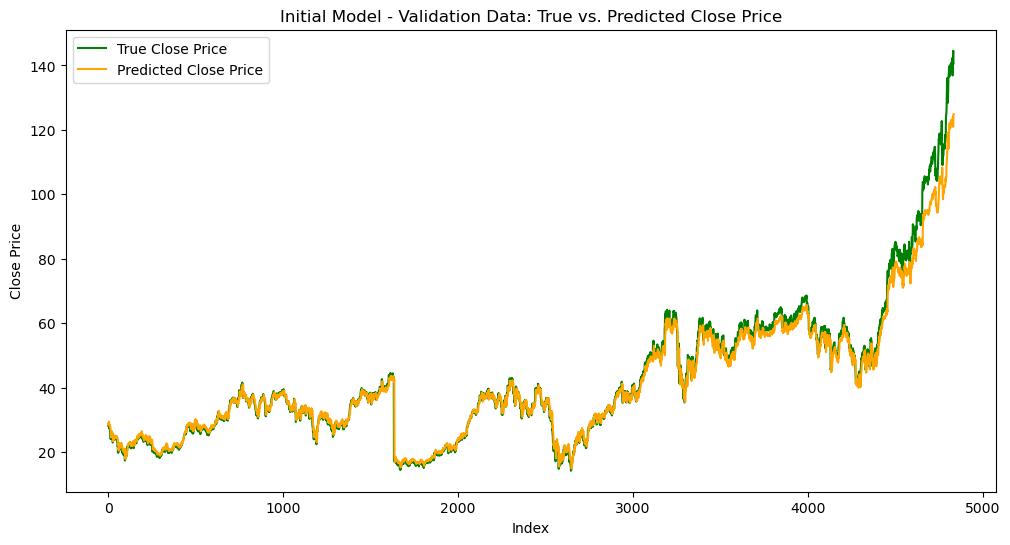

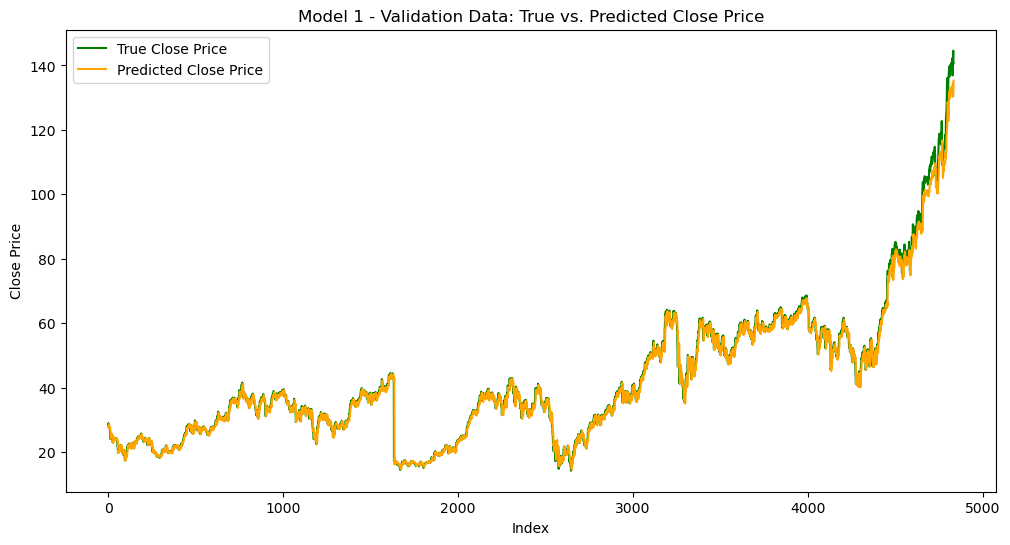

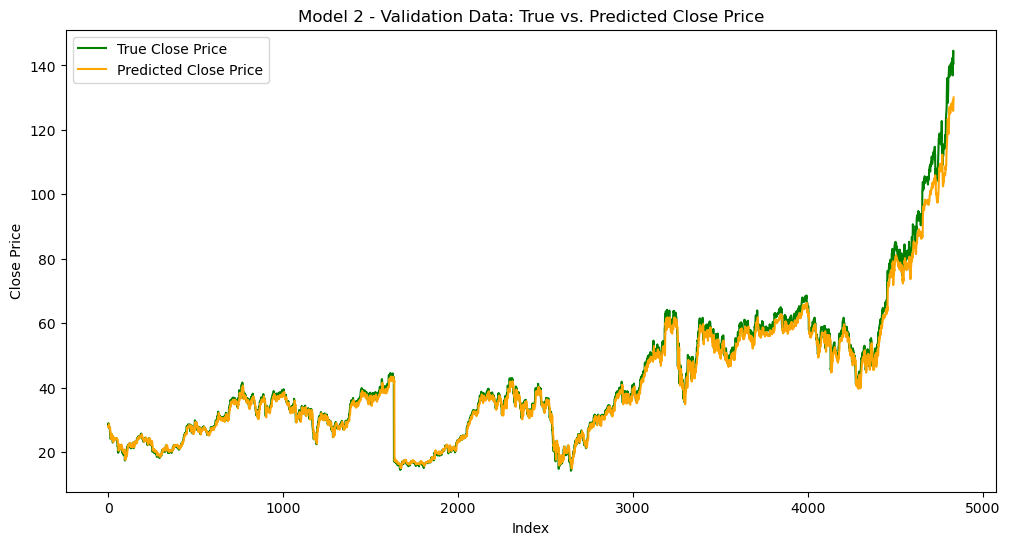

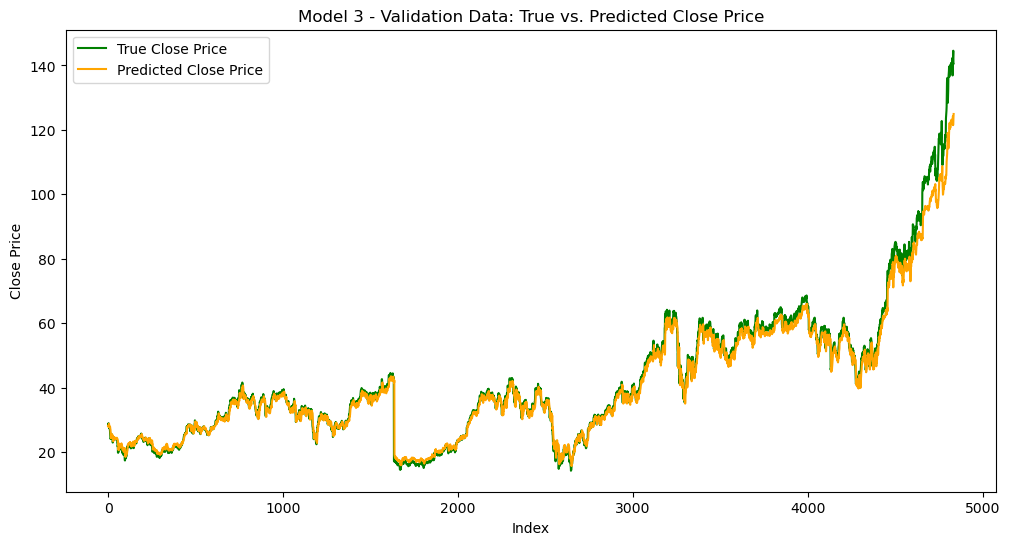

In [52]:
# Initial Model plot
plot_val_results(val_labels, y_val_pred, 'Initial Model')

# Model 1 plot
plot_val_results(val_labels, y_val_pred_1, 'Model 1')

# Model 2 plot
plot_val_results(val_labels, y_val_pred_2, 'Model 2')

# Model 3 plot
plot_val_results(val_labels, y_val_pred_3, 'Model 3')

## With the best model, making predictions on the testing data; calculating the testing loss and presenting a scatter plot of the predictions along with the true values

In [53]:
# Making predictions on the test data using the best model (model_1)
y_test_pred_scaled = model_1.predict(scaled_test_features)

# Inverse transform the predictions and the true test values
y_test_pred = label_scaler.inverse_transform(y_test_pred_scaled)

# Calculating the testing RMSE
test_loss = np.sqrt(mean_squared_error(test_labels, y_test_pred))
print("Test RMSE:", test_loss)

115/115 [==============================] - 1s 9ms/step
Test RMSE: 0.93029959779905


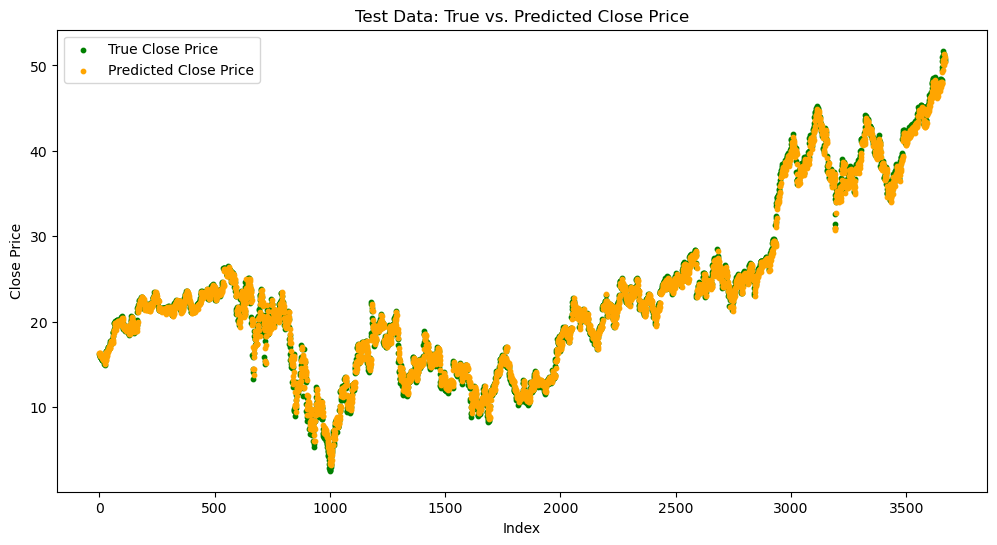

In [54]:
# Displaying a scatter plot to compare true vs. predicted close prices
plt.figure(figsize = (12, 6))
plt.scatter(range(len(test_labels)), test_labels, label = 'True Close Price', color = 'green', s = 10)
plt.scatter(range(len(y_test_pred)), y_test_pred, label = 'Predicted Close Price', color = 'orange', s = 10)
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Test Data: True vs. Predicted Close Price')
plt.legend()
plt.show()

# 3. Discussion

## Selecting the best model based on quantitative metrics and plots. Considering zooming-in on problem areas when comparing performance. Justifying the selection

### <span style='color:blue'>Based on the consolidated results table and the generated plots, model_1 is the best performing model. It has the lowest training and validation loss values and produces the most accurate plot, where the true and predicted values are nearly identical and overlap with each other.</span>

## Describing how well you feel your model would work to predict closing stock prices two days into the future. Giving a quantitative estimate of the error in the predictions

### <span style='color:blue'>Based on the performance of model_1, which showed the lowest training and validation loss and strong predictive accuracy, this model would work reasonably well in predicting closing stock prices two days into the future. A quantitative estimate of the model's error can be measured using RMSE, having a test RMSE around 0.9303, it suggests that the predicted closing price is, on average, off by approximately $0.93 from the actual value. While this is a reasonable error margin for predicting stock prices, it's important to note that stock prices are highly volatile and influenced by many external factors, which may lead to higher uncertainty in real-world predictions.</span>